In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os


# latency vs num bsm

In [31]:
n = 6
num_ToR = 4
Nrep = 28
Niter = 100  # 25, 50, 100 number of repetions for ensemble averaging

comm_qs = 4
req_rate_list = np.logspace(-1.7,1.0,20)
num_tel_bsm_list = [2] #np.arange(4,15,2)

y_color = np.linspace(0,1,len(num_tel_bsm_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):

    compute_list = []
    wait_list = []
    for i_rep in range(Nrep):
        # fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_wait_list = np.array(json.load(f))
                # print(job_duration_wait_list)
                compute_list.append(job_duration_wait_list[:,0].tolist())
                wait_list.append(job_duration_wait_list[:,1].tolist())
    # print(np.array(compute_list).shape)
    mean_compute_list = np.array(compute_list).mean(axis=0)
    mean_wait_list = np.array(wait_list).mean(axis=0)
    plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")

plt.ylabel("Mean compute time [s]")
plt.xlabel("Request frequency [1/s]")
plt.xscale("log")
# plt.yscale("log")
# plt.ylim(0,22)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (28,) + inhomogeneous part.

<Figure size 460x320 with 0 Axes>

# vs num ToR

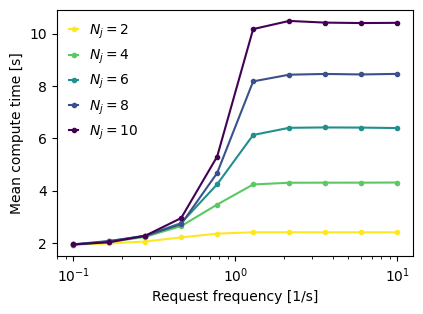

In [52]:
n = 4
num_ToR = 4
num_bsm_tel = 2
Nrep = 28
Niter = 50  # 25, 50, 100 number of repetions for ensemble averaging

req_rate_list = np.logspace(-1,1,10)
num_ToR_list = np.arange(2,11,2)

y_color = np.linspace(0,1,len(num_ToR_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_ToR in enumerate(num_ToR_list):

    compute_list = []
    wait_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        # fname = f"results/clos_multiten/q_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_wait_list = np.array(json.load(f))
                compute_list.append(job_duration_wait_list[:,0].tolist())
                wait_list.append(job_duration_wait_list[:,1].tolist())
    # print(np.array(compute_list).shape)
    mean_compute_list = np.array(compute_list).mean(axis=0)
    mean_wait_list = np.array(wait_list).mean(axis=0)
    plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_j=${num_ToR}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_j=${num_ToR}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")
        # plt.plot(depth_avg_list, latency_avg_list, "k.-",label=rf"$N_q=${num_qubits}")

plt.ylabel("Mean compute time [s]")
plt.xlabel("Request frequency [1/s]")
plt.xscale("log")
# plt.yscale("log")
# plt.ylim(0,22)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
# plt.title("new algo")
plt.show()


# multitenancy qpu

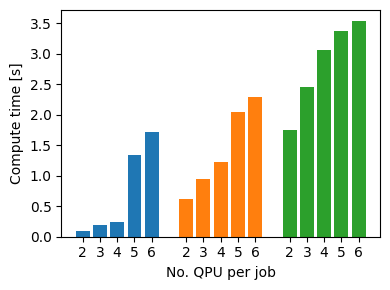

In [29]:
n = 6
num_ToR = 4
Nrep = 28
Niter = 100  # 25, 50, 100 number of repetions for ensemble averaging

comm_qs = 4
req_rate_list = 10**np.array([-1.0,0.0,1.0]) #np.logspace(-2,1.0,10)
# req_rate_list = np.logspace(-2,1.0,10)
num_tel_bsm_list = [4] #np.arange(2,15,2)
qpu_vals = [2,3,4,5,6]

y_color = np.linspace(0,1,len(num_tel_bsm_list))
colors_bar = plt.cm.viridis_r(y_color)

fig, ax = plt.subplots(figsize=(4,3))
# plt.figure(figsize=(4.6,3.2))
for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):

    counter = 0
    compute_list = []
    for i_req in range(len(req_rate_list)):
        compute_dict = {}
        for qpu in qpu_vals:
            compute_dict[f"{qpu}"] = []
        compute_list.append(compute_dict)

    for i_rep in range(Nrep):
        # fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        fname = f"results/clos_multiten_qpu/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_list = json.load(f)
                # print(job_duration_list)
                # print(job_duration_wait_list)
                for i_req, req_rate in enumerate(req_rate_list):
                    for qpu in job_duration_list[i_req].keys():
                        compute_list[i_req][qpu].append(job_duration_list[i_req][qpu])

    for i_req, req_rate in enumerate(req_rate_list):
        qpu_times_plot = []
        qpu_vals_plot = []
        for qpu in compute_list[i_req].keys():
            qpu_times_plot.append(sum(compute_list[i_req][qpu])/len(compute_list[i_req][qpu]))
            qpu_vals_plot.append(int(qpu))

        # plt.figure()
        plt.bar(6*i_req + np.array(qpu_vals_plot),qpu_times_plot)
        # plt.show()
    # print(np.array(compute_list).shape)
    # mean_compute_list = np.array(compute_list).mean(axis=0)
    # mean_wait_list = np.array(wait_list).mean(axis=0)
    # plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")

plt.xticks(list(range(2,7))+list(range(8,13))+list(range(14,19)))

# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = 'Testing'
labels = list(range(2,7))+list(range(2,7))+list(range(2,7))

ax.set_xticklabels(labels)

# plt.xtickslabel(list(range(2,7))+list(range(2,7))+list(range(2,7)))
# print(compute_list)
# plt.ylabel("Mean compute time [s]")
# plt.xlabel("Request frequency [1/s]")
# plt.xscale("log")
# # plt.yscale("log")
# plt.ylim(0,4)
# # plt.xlim(0,240)
# plt.legend(handlelength=0.6, frameon=False)
# # plt.title("new algo")
plt.xlabel("No. QPU per job")
plt.ylabel("Compute time [s]")
plt.tight_layout()
# plt.savefig("figures/multiten_vs_qpu_n6.pdf")
plt.show()


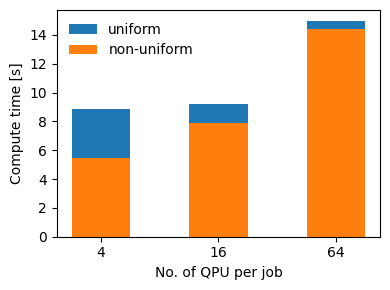

In [26]:
n = 8
num_ToR = 8
Nrep = 28
# Niter = 5  # 25, 50, 100 number of repetions for ensemble averaging
num_bsm_tel = 4

comm_qs = 4
# req_rate_list = np.logspace(-2,1.0,10)
num_tel_bsm_list = [4] #np.arange(2,15,2)
qpu_vals = [4,16,64]

# y_color = np.linspace(0,1,len(num_tel_bsm_list))
# colors_bar = plt.cm.viridis_r(y_color)

fig, ax = plt.subplots(figsize=(4,3))
# plt.figure(figsize=(4.6,3.2))
# for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):
uniform = [0,1]
labels = ["uniform", "non-uniform"]
for i_n in uniform:
    counter = 0
    compute_dict = {}
    for qpu in qpu_vals:
        compute_dict[f"{qpu}"] = []

    for i_rep in range(Nrep):
        if i_n == 0:
            Niter = 10  
            fname = f"results/clos_multiten_rates_qpu/q_uniform_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        else:
            Niter = 5  
            fname = f"results/clos_multiten_rates_qpu/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_list = json.load(f)
                # print(job_duration_list)
                for qpu in job_duration_list.keys():
                    compute_dict[qpu].append(job_duration_list[qpu])

    qpu_times_plot = []
    qpu_vals_plot = []
    for qpu in compute_dict.keys():
        qpu_times_plot.append(sum(compute_dict[qpu])/len(compute_dict[qpu]))
        qpu_vals_plot.append(int(qpu))

    # widths = np.diff(qpu_vals_plot + [qpu_vals_plot[-1] * 2])
    # plt.bar(qpu_vals_plot,qpu_times_plot, width=4)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)
    # plt.bar(x, height, widths, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)
    x_plot = range(len(qpu_vals_plot))
    plt.bar(x_plot,qpu_times_plot,label=labels[i_n], width=0.5)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)

        # plt.show()
    # print(np.array(compute_list).shape)
    # mean_compute_list = np.array(compute_list).mean(axis=0)
    # mean_wait_list = np.array(wait_list).mean(axis=0)
    # plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")

plt.xticks(x_plot)

# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = 'Testing'
labels = qpu_vals_plot
ax.set_xticklabels(labels)
plt.legend(frameon=False)

plt.xlabel("No. of QPU per job")
plt.ylabel("Compute time [s]")
plt.tight_layout()
plt.savefig("figures/multiten_small_large.pdf")
plt.show()
